In [1]:
from matplotlib import pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from collections import namedtuple
import numpy as np
import torch

In [2]:
data_dict = torch.load("/ssd_scratch/cvit/dksingh/idd_individual_features.pth")
data_np = np.array(list(data_dict.keys()))
print(data_np.shape)

data_labels_np = np.array(list(data_dict.values()))
print(data_labels_np.shape)


(93012, 1000)
(93012,)


In [3]:
Label = namedtuple( 'Label' , [

    'name'        , 
    'id'          ,

    'csId'        ,

    'csTrainId'   ,    

    'level4Id'    , 
    'level3Id'    , 
    'level2IdName', 
    'level2Id'    , 
    'level1Id'    , 

    'hasInstances', 
    'ignoreInEval', 
    'color'       , 
    ] )


#--------------------------------------------------------------------------------
# A list of all labels
#--------------------------------------------------------------------------------


labels = [
    #       name                     id    csId     csTrainId level4id        level3Id  category           level2Id      level1Id  hasInstances   ignoreInEval   color
    Label(  'road'                 ,  0   ,  7 ,     0 ,       0   ,     0  ,   'drivable'            , 0           , 0      , False        , False        , (128, 64,128)  ),
    Label(  'parking'              ,  1   ,  9 ,   255 ,       1   ,     1  ,   'drivable'            , 1           , 0      , False        , False         , (250,170,160)  ),
    Label(  'drivable fallback'    ,  2   ,  255 ,   255 ,     2   ,       1  ,   'drivable'            , 1           , 0      , False        , False         , ( 81,  0, 81)  ),
    Label(  'sidewalk'             ,  3   ,  8 ,     1 ,       3   ,     2  ,   'non-drivable'        , 2           , 1      , False        , False        , (244, 35,232)  ),
    Label(  'rail track'           ,  4   , 10 ,   255 ,       3   ,     3  ,   'non-drivable'        , 3           , 1      , False        , False         , (230,150,140)  ),
    Label(  'non-drivable fallback',  5   , 255 ,     9 ,      4   ,      3  ,   'non-drivable'        , 3           , 1      , False        , False        , (152,251,152)  ),
    Label(  'person'               ,  6   , 24 ,    11 ,       5   ,     4  ,   'living-thing'        , 4           , 2      , True         , False        , (220, 20, 60)  ),
    Label(  'animal'               ,  7   , 255 ,   255 ,      6   ,      4  ,   'living-thing'        , 4           , 2      , True         , True        , (246, 198, 145)),
    Label(  'rider'                ,  8   , 25 ,    12 ,       7   ,     5  ,   'living-thing'        , 5           , 2      , True         , False        , (255,  0,  0)  ),
    Label(  'motorcycle'           ,  9   , 32 ,    17 ,       8   ,     6  ,   '2-wheeler'           , 6           , 3      , True         , False        , (  0,  0,230)  ),
    Label(  'bicycle'              , 10   , 33 ,    18 ,       9   ,     7  ,   '2-wheeler'           , 6           , 3      , True         , False        , (119, 11, 32)  ),
    Label(  'autorickshaw'         , 11   , 255 ,   255 ,     10   ,      8  ,   'autorickshaw'        , 7           , 3      , True         , False        , (255, 204, 54) ),
    Label(  'car'                  , 12   , 26 ,    13 ,      11   ,     9  ,   'car'                 , 7           , 3      , True         , False        , (  0,  0,142)  ),
    Label(  'truck'                , 13   , 27 ,    14 ,      12   ,     10 ,   'large-vehicle'       , 8           , 3      , True         , False        , (  0,  0, 70)  ),
    Label(  'bus'                  , 14   , 28 ,    15 ,      13   ,     11 ,   'large-vehicle'       , 8           , 3      , True         , False        , (  0, 60,100)  ),
    Label(  'caravan'              , 15   , 29 ,   255 ,      14   ,     12 ,   'large-vehicle'       , 8           , 3      , True         , True         , (  0,  0, 90)  ),
    Label(  'trailer'              , 16   , 30 ,   255 ,      15   ,     12 ,   'large-vehicle'       , 8           , 3      , True         , True         , (  0,  0,110)  ),
    Label(  'train'                , 17   , 31 ,    16 ,      15   ,     12 ,   'large-vehicle'       , 8           , 3      , True         , True        , (  0, 80,100)  ),
    Label(  'vehicle fallback'     , 18   , 355 ,   255 ,     15   ,      12 ,   'large-vehicle'       , 8           , 3      , True         , False        , (136, 143, 153)),  
    Label(  'curb'                 , 19   ,255 ,   255 ,      16   ,     13 ,   'barrier'             , 9           , 4      , False        , False        , (220, 190, 40)),
    Label(  'wall'                 , 20   , 12 ,     3 ,      17   ,     14 ,   'barrier'             , 9           , 4      , False        , False        , (102,102,156)  ),
    Label(  'fence'                , 21   , 13 ,     4 ,      18   ,     15 ,   'barrier'             , 10           , 4      , False        , False        , (190,153,153)  ),
    Label(  'guard rail'           , 22   , 14 ,   255 ,      19   ,     16 ,   'barrier'             , 10          , 4      , False        , False         , (180,165,180)  ),
    Label(  'billboard'            , 23   , 255 ,   255 ,     20   ,      17 ,   'structures'          , 11           , 4      , False        , False        , (174, 64, 67) ),
    Label(  'traffic sign'         , 24   , 20 ,     7 ,      21   ,     18 ,   'structures'          , 11          , 4      , False        , False        , (220,220,  0)  ),
    Label(  'traffic light'        , 25   , 19 ,     6 ,      22   ,     19 ,   'structures'          , 11          , 4      , False        , False        , (250,170, 30)  ),
    Label(  'pole'                 , 26   , 17 ,     5 ,      23   ,     20 ,   'structures'          , 12          , 4      , False        , False        , (153,153,153)  ),
    Label(  'polegroup'            , 27   , 18 ,   255 ,      23   ,     20 ,   'structures'          , 12          , 4      , False        , False         , (153,153,153)  ),
    Label(  'obs-str-bar-fallback' , 28   , 255 ,   255 ,     24   ,      21 ,   'structures'          , 12          , 4      , False        , False        , (169, 187, 214) ),  
    Label(  'building'             , 29   , 11 ,     2 ,      25   ,     22 ,   'construction'        , 13          , 5      , False        , False        , ( 70, 70, 70)  ),
    Label(  'bridge'               , 30   , 15 ,   255 ,      26   ,     23 ,   'construction'        , 13          , 5      , False        , False         , (150,100,100)  ),
    Label(  'tunnel'               , 31   , 16 ,   255 ,      26   ,     23 ,   'construction'        , 13          , 5      , False        , False         , (150,120, 90)  ),
    Label(  'vegetation'           , 32   , 21 ,     8 ,      27   ,     24 ,   'vegetation'          , 14          , 5      , False        , False        , (107,142, 35)  ),
    Label(  'sky'                  , 33   , 23 ,    10 ,      28   ,     25 ,   'sky'                 , 15          , 6      , False        , False        , ( 70,130,180)  ),
    Label(  'fallback background'  , 34   , 255 ,   255 ,     29   ,      25 ,   'object fallback'     , 15          , 6      , False        , False        , (169, 187, 214)),
    Label(  'unlabeled'            , 35   ,  0  ,     255 ,   255   ,      255 ,   'void'                , 255         , 255    , False        , True         , (  0,  0,  0)  ),
    Label(  'ego vehicle'          , 36   ,  1  ,     255 ,   255   ,      255 ,   'void'                , 255         , 255    , False        , True         , (  0,  0,  0)  ),
    Label(  'rectification border' , 37   ,  2  ,     255 ,   255   ,      255 ,   'void'                , 255         , 255    , False        , True         , (  0,  0,  0)  ),
    Label(  'out of roi'           , 38   ,  3  ,     255 ,   255   ,      255 ,   'void'                , 255         , 255    , False        , True         , (  0,  0,  0)  ),
    Label(  'license plate'        , 39   , 255 ,     255 ,   255   ,      255 ,   'vehicle'             , 255         , 255    , False        , True         , (  0,  0,142)  ),
    
]           

custom_color_map = {label.id:label.color for label in labels}

In [4]:
custom_color_list = [list(custom_color_map[label_val]) for label_val in data_labels_np]
custom_color_list = np.array(custom_color_list)

# [list(custom_color_map[label_val]) for label_val in data_labels_np][0:5]
custom_color_list = custom_color_list/255

(93012, 3)


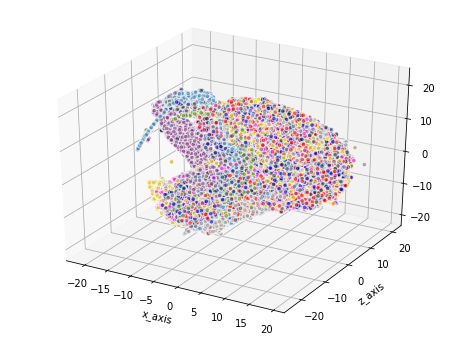

In [5]:
import numpy as np
from sklearn.manifold import TSNE

training_size = 93012
X_embedded = TSNE(n_components=3,perplexity=100,n_iter=1000,learning_rate=1000).fit_transform(data_np[0:training_size,:])

print(X_embedded.shape)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = X_embedded[:,0];
ys = X_embedded[:,1];
zs = X_embedded[:,2];
ax.scatter(xs, ys,zs, alpha=0.6,c = custom_color_list[0:training_size], edgecolors='w')
    
ax.set_xlabel('x_axis')
ax.set_ylabel('y_axis')
ax.set_ylabel('z_axis')

plt.show()